In [45]:
import torch
import torch.nn as nn
import torchvision
import os
import pickle
import scipy.io
import numpy as np
from data_loader import get_loader
from torch.autograd import Variable
from torch import optim
from model import G12, G21
from model import D1, D2



step = 39999
g12_path = os.path.join(model_path, 'g12-%d.pkl' %(step+1))
g21_path = os.path.join(model_path, 'g21-%d.pkl' %(step+1))
d1_path = os.path.join(model_path, 'd1-%d.pkl' %(step+1))
d2_path = os.path.join(model_path, 'd2-%d.pkl' %(step+1))


model_path = "./models/"
svhn_path = "./svhn/"
mnist_path = "./mnist/"
g_conv_dim = 64
image_size = 32
batch_size = 64
num_workers = 2

In [46]:
g12 = G12(conv_dim=g_conv_dim)
g21 = G21(conv_dim=g_conv_dim)

In [47]:
g12.load_state_dict(torch.load(g12_path))
g21.load_state_dict(torch.load(g21_path))

In [48]:
from torchvision import datasets
from torchvision import transforms
transform = transforms.Compose([
                    transforms.Scale(image_size),
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    
svhn = datasets.SVHN(root=svhn_path, download=True, transform=transform)
mnist = datasets.MNIST(root=mnist_path, download=True, transform=transform)

svhn_loader = torch.utils.data.DataLoader(dataset=svhn,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=num_workers)

mnist_loader = torch.utils.data.DataLoader(dataset=mnist,
                                           batch_size=batch_size,
                                           shuffle=False,
                                           num_workers=num_workers)

svhn_iter = iter(svhn_loader)
mnist_iter = iter(mnist_loader)
iter_per_epoch = min(len(svhn_iter), len(mnist_iter))


def to_var( x):
        """Converts numpy to variable."""
        #if torch.cuda.is_available():
        #    x = x.cuda()
        return Variable(x)
    
def to_data( x):
    """Converts variable to numpy."""
    #if torch.cuda.is_available():
    #    x = x.cpu()
    return x.data.numpy()
fixed_svhn = to_var(svhn_iter.next()[0])
fixed_mnist = to_var(mnist_iter.next()[0])

Using downloaded and verified file: ./svhn/train_32x32.mat


In [49]:
fake_svhn = g12(fixed_mnist)
fake_mnist = g21(fixed_svhn)



mnist, fake_mnist = to_data(fixed_mnist), to_data(fake_mnist)
svhn , fake_svhn =  to_data(fixed_svhn), to_data(fake_svhn)


In [55]:
def merge_images(sources, targets, k=10):
        _, _, h, w = sources.shape
        row = 8
        merged = np.zeros([3, row*h, row*w*2])
        for idx, (s, t) in enumerate(zip(sources, targets)):
            i = idx // row
            j = idx % row
            merged[:, i*h:(i+1)*h, (j*2)*h:(j*2+1)*h] = s
            merged[:, i*h:(i+1)*h, (j*2+1)*h:(j*2+2)*h] = t
        return merged.transpose(1, 2, 0)


#merged = merge_images(mnist, fake_svhn)
merged = merge_images(svhn, fake_mnist)


In [51]:
print(merged.shape)

(256, 512, 3)


In [52]:
path = os.path.join( 'abc-m-s-%d.png' %(step+1))
scipy.misc.imsave(path, merged)

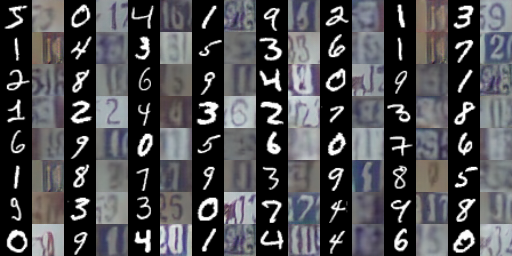

In [53]:
from IPython.display import Image
Image("./abc-m-s-35000.png")


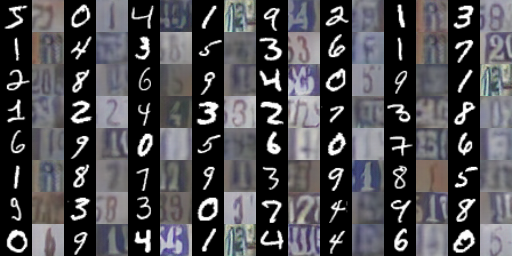

In [54]:
from IPython.display import Image
Image("./abc-m-s-40000.png")
